In [1]:
# import relevant/useful libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read abundance/biomass data and environmental data
AB_df = pd.read_csv("GuadaAB.csv")
env_df = pd.read_csv("GEnv_NOgaps.csv")

In [3]:
# take a look at environmental data
env_df.head(10)

,Unnamed: 0,Sample,Site,Tide,Code,Date,Date5.1,Year0-,Sitio,Copos,...,prcp_mean14,year,month,day,nao_idx,nao_mean7,nao_mean28,nao_mean21,nao_mean56,nao_mean14
0,1,1.0,1,1,111.0,6/3/97,6/19/97,0.0,Horcada,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143
1,2,1.0,1,2,112.0,6/4/97,6/19/97,0.0,Horcada,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143
2,3,1.0,1,3,113.0,6/5/97,6/19/97,0.0,Horcada,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143
3,4,1.0,1,4,114.0,6/6/97,6/19/97,0.0,Horcada,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143
4,5,1.0,2,1,121.0,6/7/97,6/19/97,0.0,Mata,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143
5,6,1.0,2,2,122.0,6/8/97,6/19/97,0.0,Mata,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143
6,7,1.0,2,3,123.0,6/9/97,6/19/97,0.0,Mata,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143
7,8,1.0,2,4,124.0,6/10/97,6/19/97,0.0,Mata,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143
8,9,1.0,3,1,131.0,6/11/97,6/19/97,0.0,Tarfia,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143
9,10,1.0,3,2,132.0,6/12/97,6/19/97,0.0,Tarfia,NaN,...,1.2,1997.0,6.0,19.0,-0.75,-1.025429,-0.408821,-0.679,-0.316143,-0.962143


In [4]:
# save only columns of interest
env_df  = env_df[["Code", "TurbidityNTU", "Temp", "Si"]].fillna(0)
AB_df = AB_df[["Code", "Specie", "A", "B", "Date5.1", "Site", "Sample",'Tide']]

In [5]:
# merge the two dataframes into one
comp_df = pd.merge(AB_df, env_df, how="inner", on="Code")
# discard data after 17/11/19 due to inconsistencies
comp_df = comp_df[comp_df['Date5.1'] < '2017-11-19']
comp_df = comp_df[comp_df['Date5.1'] > '1970-01-01']

In [6]:
# take a look at new dataframe
comp_df.head(10)

,Code,Specie,A,B,Date5.1,Site,Sample,Tide,TurbidityNTU,Temp,Si
0,111,Alburnus.alburnus,0.000000,0.000000,1997-06-19,1,1,1,37.811963,23.2,4.0
1,111,Alosa.fallax,0.000000,0.000000,1997-06-19,1,1,1,37.811963,23.2,4.0
2,111,Ameiurus.melas,0.000000,0.000000,1997-06-19,1,1,1,37.811963,23.2,4.0
3,111,Ammodytes.tobianus,0.000000,0.000000,1997-06-19,1,1,1,37.811963,23.2,4.0
4,111,Anchialina.agilis,0.000000,0.000000,1997-06-19,1,1,1,37.811963,23.2,4.0
5,111,Anguilla.anguilla.(anguila),0.000000,0.000000,1997-06-19,1,1,1,37.811963,23.2,4.0
6,111,Anguilla.anguilla.(angula),0.965506,0.304134,1997-06-19,1,1,1,37.811963,23.2,4.0
7,111,Aphanius.baeticus,0.000000,0.000000,1997-06-19,1,1,1,37.811963,23.2,4.0
8,111,Aphia.minuta,0.000000,0.000000,1997-06-19,1,1,1,37.811963,23.2,4.0
9,111,Argyrosomus.regius,0.000000,0.000000,1997-06-19,1,1,1,37.811963,23.2,4.0


In [7]:
# pick out data from site 3 and 5
comp_df = comp_df[(comp_df['Site']==3) | (comp_df['Site']==5)]

# add the site-tide parings to dataframe
comp_df['SiteTide'] = list(zip(comp_df.Site, comp_df.Tide))

In [8]:
# check it worked as intended
comp_df.head(10)

,Code,Specie,A,B,Date5.1,Site,Sample,Tide,TurbidityNTU,Temp,Si,SiteTide
1168,131,Alburnus.alburnus,0.000000,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1169,131,Alosa.fallax,0.000000,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1170,131,Ameiurus.melas,0.000000,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1171,131,Ammodytes.tobianus,0.000000,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1172,131,Anchialina.agilis,0.000000,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1173,131,Anguilla.anguilla.(anguila),4.258416,28.637845,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1174,131,Anguilla.anguilla.(angula),39.390344,10.007277,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1175,131,Aphanius.baeticus,0.000000,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1176,131,Aphia.minuta,0.000000,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1177,131,Argyrosomus.regius,0.000000,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"


In [9]:
# pick out the significant species as given by Cesar Vilas
# and centrality measures
sig_species = [
        "Mesopodopsis.slabberi",
        "Neomysis.integer",
        "Rhopalophthalmus.tartessicus",
        "Pomatoschistus",
        "Engraulis.encrasicolus",
        "Crangon.crangon",
        "Palaemon.longirostris",
        "Sardina.pilchardus",
        "Palaemon.macrodactylus",
        "Dicentrarchus.punctatus",
        "Liza.ramada",
        "Liza.aurata",
        "Argyrosomus.regius",
        "Chelon.labrosus",
        "Cyprinus.carpio",
    ]
compsig_df = comp_df.loc[comp_df['Specie'].isin(sig_species)]
# check it worked
compsig_df.head(10)

,Code,Specie,A,B,Date5.1,Site,Sample,Tide,TurbidityNTU,Temp,Si,SiteTide
1177,131,Argyrosomus.regius,0.000000e+00,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1190,131,Chelon.labrosus,0.000000e+00,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1194,131,Crangon.crangon,0.000000e+00,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1195,131,Cyprinus.carpio,3.300272e+01,152.749366,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1199,131,Dicentrarchus.punctatus,8.729752e+02,1190.865912,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1210,131,Engraulis.encrasicolus,4.684257e+01,5.340053,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1237,131,Liza.aurata,0.000000e+00,0.000000,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1238,131,Liza.ramada,6.387623e+00,26.508637,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1244,131,Mesopodopsis.slabberi,4.309517e+03,13.771716,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"
1248,131,Neomysis.integer,1.639490e+06,15903.052911,1997-06-19,3,1,1,35.73205,22.0,2.0,"(3, 1)"


In [20]:
"""
The function in this cell overlays two plots, the first plot is a histogram of the salinity that
has been normalised so that the total of the bars sum to 1.
The other plot that has been overlayed over the salinity histogram is a bar plot of the proportion 
of the biomass of each species sampled in the respective 'salinity bin'.
If a species is well adapted to the typical salinity at the site, one expects the proportion of 
the biomass to follow the curve of the salinity. If a species is not well adapted to the salinity,
one expects a disagreement between the biomass barplot and the salinity histogram.
"""

def plot_salinity_biomass(compsig_df, n_bins, species):
    """
    Inputs:
    compsig_df - Dataframe with the species, salinity, biomass, site and tide.
    n_bins - Number of bins to use for the salinity histogram and consequently for the 
             biomass barplots.
    species - Species in the dataframe to perform the plots for.
    
    Outputs:
    returns nothing
    plots above described graph
    if line 121 uncommented, saves figures
    """
        
    # get maximum value of salinity
    Si_max = compsig_df['Si'].max()
    
    # create the salinity bins
    bins = np.linspace(-0.000001, Si_max, n_bins)
    
    # get mean value of the bins
    x_plot = np.zeros(n_bins - 1)
    for k in range(n_bins -1):
        x_plot[k] = (bins[k+1] + bins[k]) / 2
    
    # create 8 dataframes with the salinity at each site and tide
    
    # pick out site 3 at ebb
    Si_3_ebb_df = compsig_df[(compsig_df['Site']==3)]
    Si_3_ebb_df = Si_3_ebb_df[(Si_3_ebb_df['Tide']==1) | (Si_3_ebb_df['Tide']==3)]
    
    # pick out site 3 at flow
    Si_3_flow_df = compsig_df[(compsig_df['Site']==3)]
    Si_3_flow_df = Si_3_flow_df[(Si_3_flow_df['Tide']==2) | (Si_3_flow_df['Tide']==4)]

    # pick out site 5 at ebb
    Si_5_ebb_df = compsig_df[(compsig_df['Site']==5)]
    Si_5_ebb_df = Si_5_ebb_df[(Si_5_ebb_df['Tide']==1) | (Si_5_ebb_df['Tide']==3)]
    
    # pick out site 5 at flow
    Si_5_flow_df = compsig_df[(compsig_df['Site']==5)]
    Si_5_flow_df = Si_5_flow_df[(Si_5_flow_df['Tide']==2) | (Si_5_flow_df['Tide']==4)]
    
    # initialise arrays to save proportion of observed biomass
    prop1 = np.zeros(n_bins-1)
    prop2 = np.zeros(n_bins-1)
    prop3 = np.zeros(n_bins-1)
    prop4 = np.zeros(n_bins-1)
    
    # run over the species specified 
    for specie in species:
        
        # get data for the species at each site and tide
        data1 = Si_3_ebb_df[(Si_3_ebb_df["Specie"] == specie)]
        data2 = Si_3_flow_df[(Si_3_flow_df["Specie"] == specie)]
        data3 = Si_5_ebb_df[(Si_5_ebb_df["Specie"] == specie)]
        data4 = Si_5_flow_df[(Si_5_flow_df["Specie"] == specie)]

        # compute total biomass at each site and tide
        total1 = data1['B'].sum()
        total2 = data2['B'].sum()
        total3 = data3['B'].sum()
        total4 = data4['B'].sum()
        
        # for each bin compute propotion of biomass in that interval 
        for j in range(n_bins-1):
            
            # find all entries of data were salinity within interval
            bin_df1 = data1[(data1["Si"] > bins[j]) & (data1["Si"] <= bins[j+1])]
            bin_df2 = data2[(data2["Si"] > bins[j]) & (data2["Si"] <= bins[j+1])]
            bin_df3 = data3[(data3["Si"] > bins[j]) & (data3["Si"] <= bins[j+1])]
            bin_df4 = data4[(data4["Si"] > bins[j]) & (data4["Si"] <= bins[j+1])]

            # compute proportion of biomass in interval
            prop1[j] = bin_df1['B'].sum() / total1
            prop2[j] = bin_df2['B'].sum() / total2
            prop3[j] = bin_df3['B'].sum() / total3
            prop4[j] = bin_df4['B'].sum() / total4

            
        
        
        # set up grid for plots
        fig, axs = plt.subplots(figsize = (15,10), nrows = 2, ncols = 2, sharex = False, sharey = True)
        
        plt.rc('axes', titlesize=20)     # fontsize of the axes title
        plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
        plt.rc('legend', fontsize=10)    # legend fontsize
        plt.rc('figure', titlesize=20)
        
        # plot figures
        axs[0,0].stem(x_plot, prop1, label = 'Biomass', linefmt = 'C0-', basefmt = 'C0-')
        axs[0,0].hist(data1["Si"], bins = bins, linewidth = 0.5, alpha = 0.2, density = True, color = '#30d5c8', label = 'Salinity')
        axs[0,1].stem(x_plot, prop2, linefmt = 'C0-', basefmt = 'C0-')
        axs[0,1].hist(data2["Si"], bins = bins, linewidth = 0.5, alpha = 0.2, density = True, color = '#30d5c8')

        axs[1,0].stem(x_plot, prop3, linefmt = 'C0-', basefmt = 'C0-')
        axs[1,0].hist(data3["Si"], bins = bins, linewidth = 0.5, alpha = 0.2, density = True, color = '#30d5c8')
        axs[1,1].stem(x_plot, prop4, linefmt = 'C0-', basefmt = 'C0-')
        axs[1,1].hist(data4["Si"], bins = bins, linewidth = 0.5, alpha = 0.2, density = True, color = '#30d5c8')

        axs[0,0].title.set_text('Site 3 Ebb')
        axs[0,1].title.set_text('Site 3 Flow')
        axs[1,0].title.set_text('Site 5 Ebb')
        axs[1,1].title.set_text('Site 5 Flow')
        
        axs[0,0].legend()
#         axs[0,0].set_xlabel("Si")
#         axs[0,1].set_xlabel("Si")
        axs[1,0].set_xlabel("Si")
        axs[1,1].set_xlabel("Si")
        
        axs[0,0].set_ylabel("%", rotation = 0, labelpad = 10)
#         axs[0,1].set_ylabel("Si")
        axs[1,0].set_ylabel("%", rotation = 0, labelpad = 10)
#         axs[1,1].set_ylabel("Si")
        
        plt.suptitle('{}'.format(specie))
        
        # optionally save figures after plotting
        #plt.savefig('{}.png'.format(specie), dpi=300, bbox_inches='tight')
        plt.show()

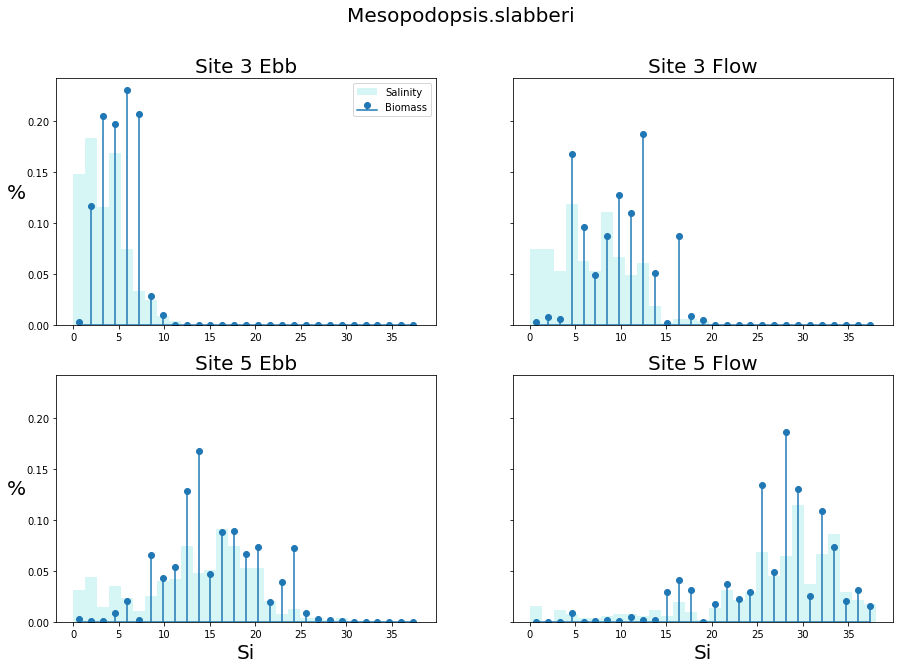

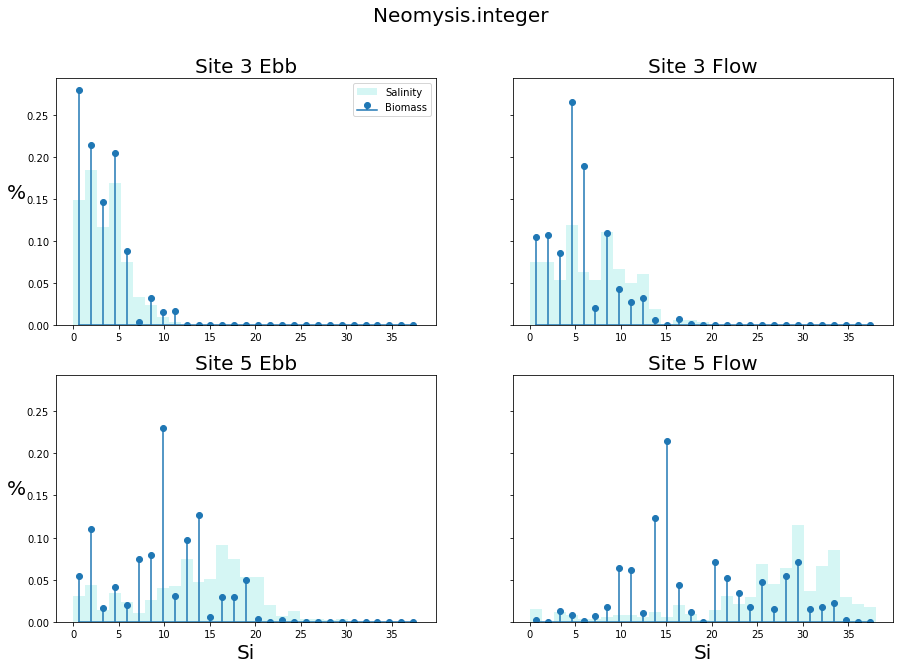

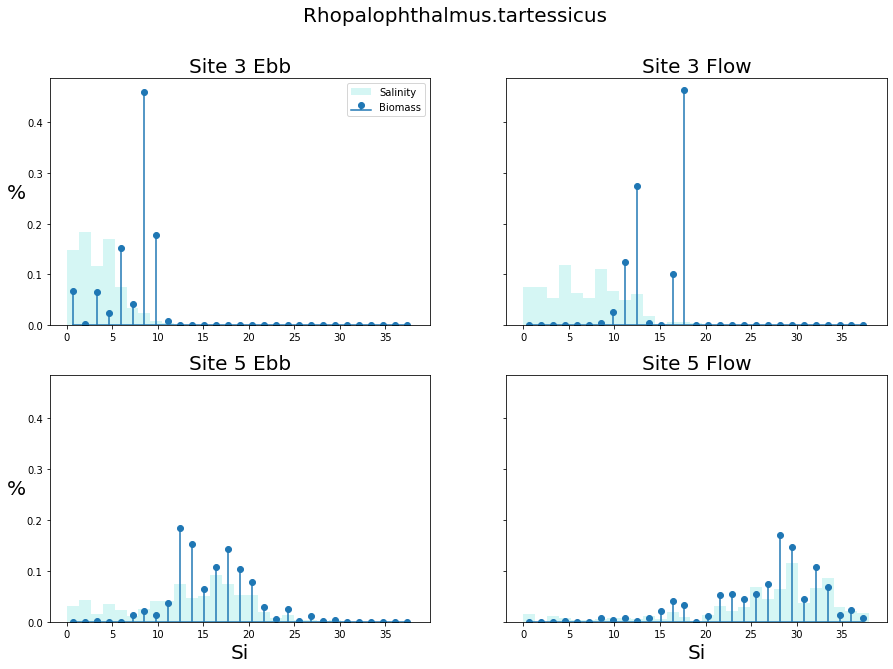

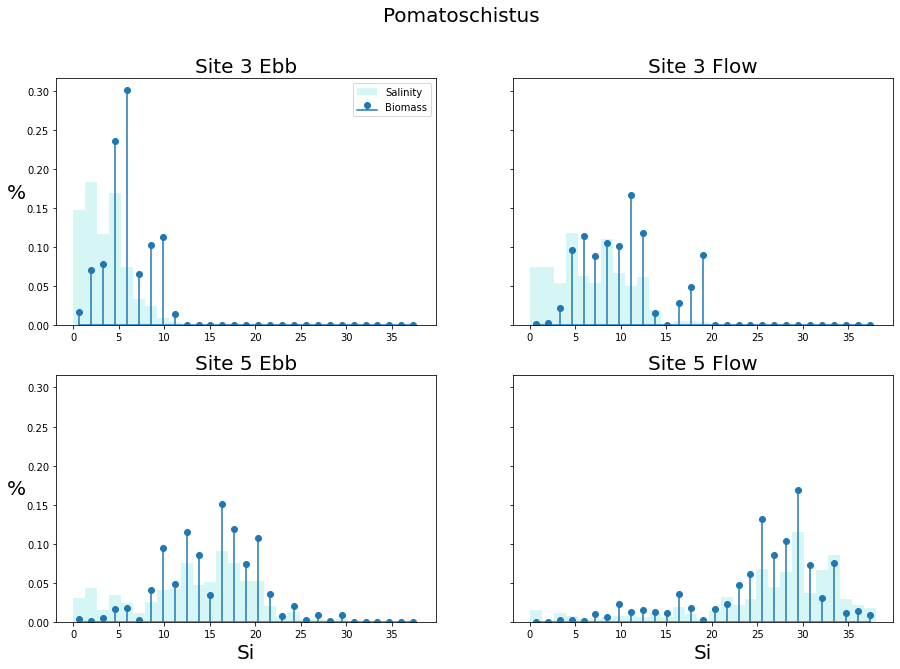

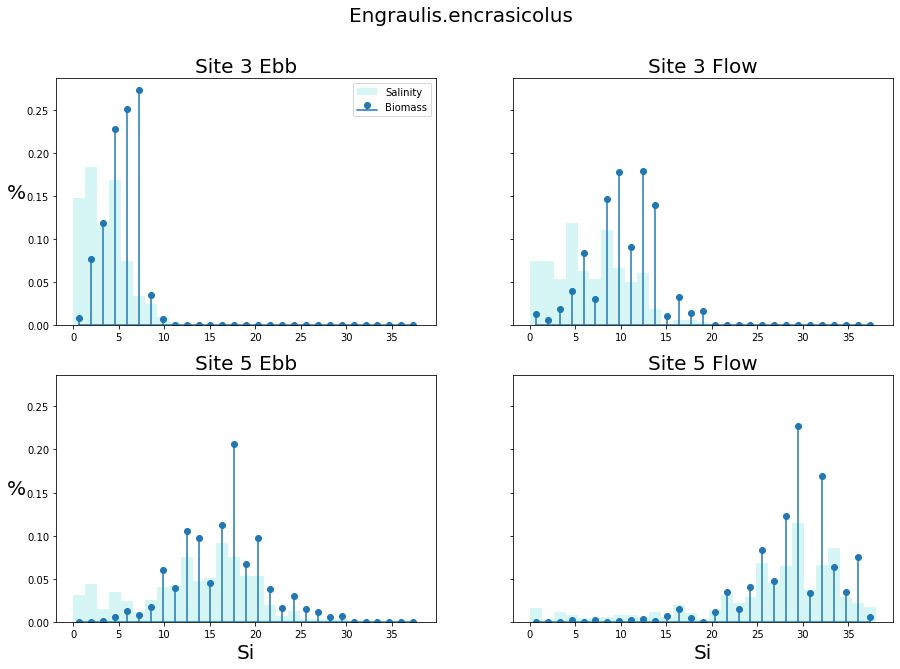

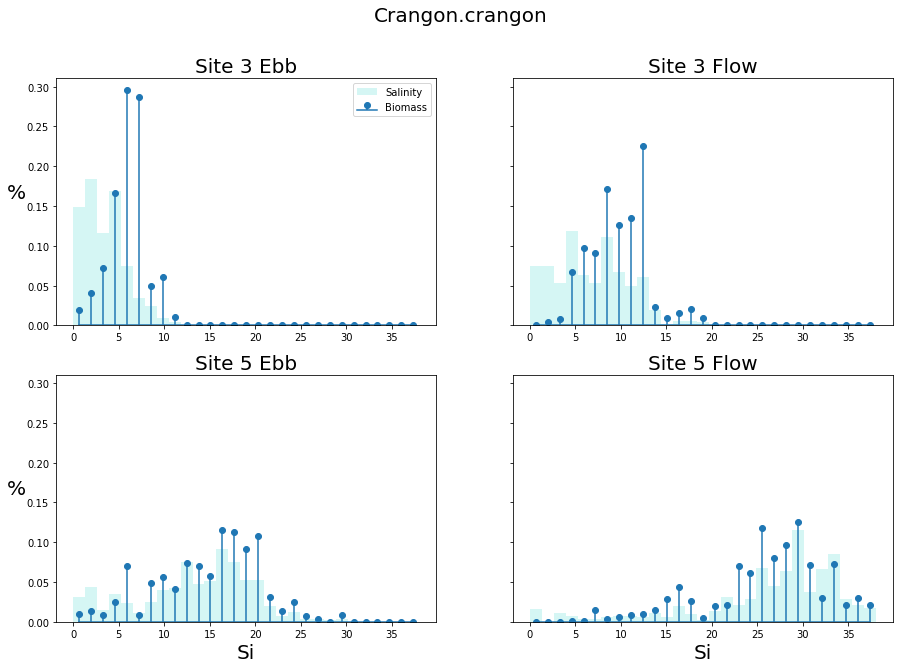

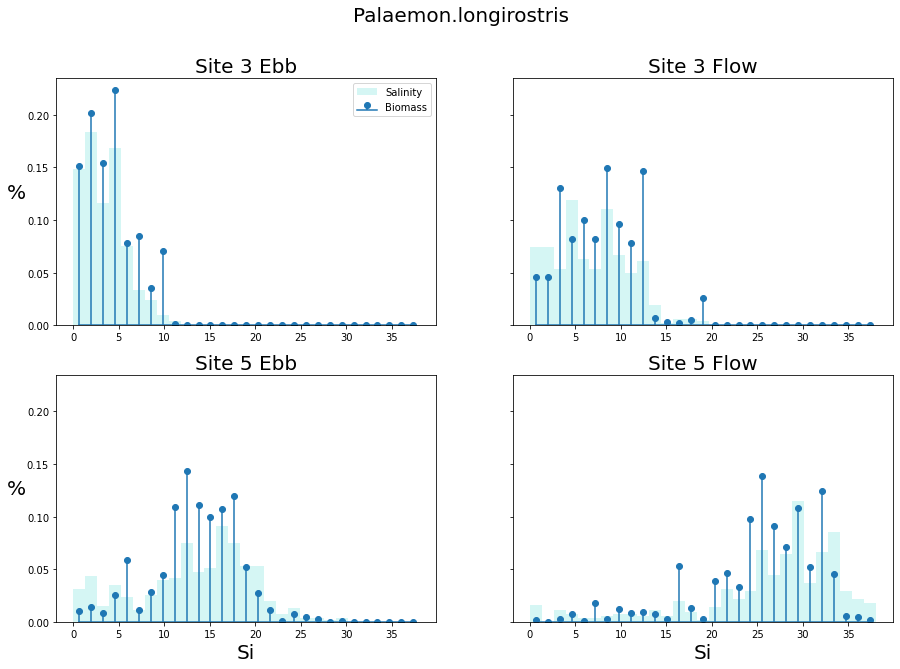

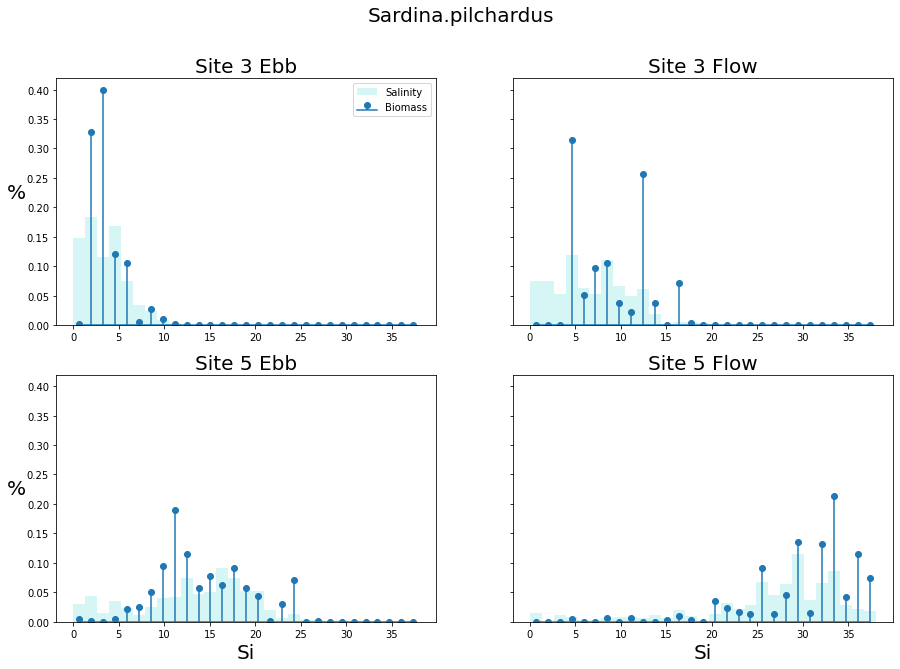

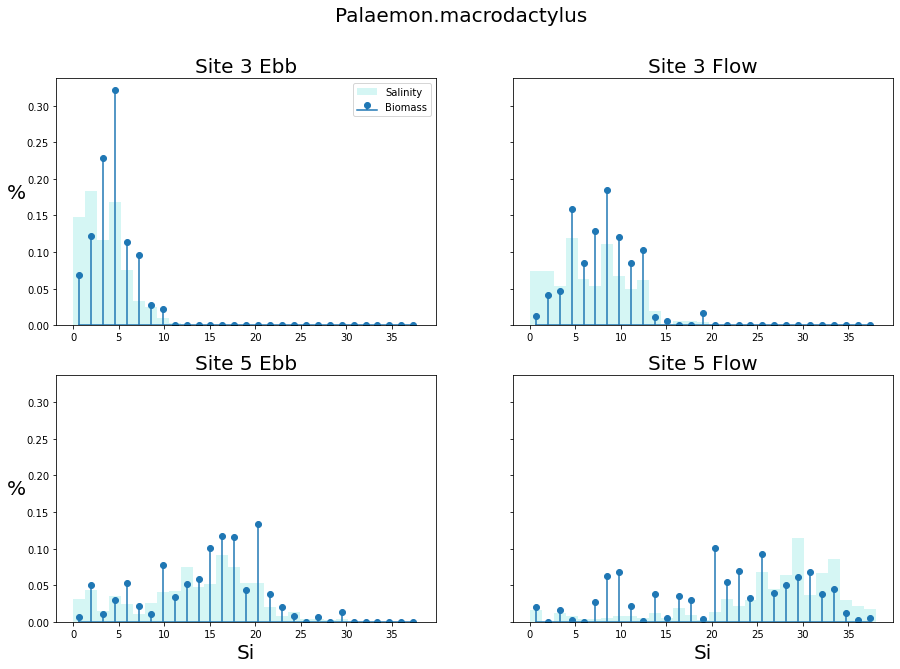

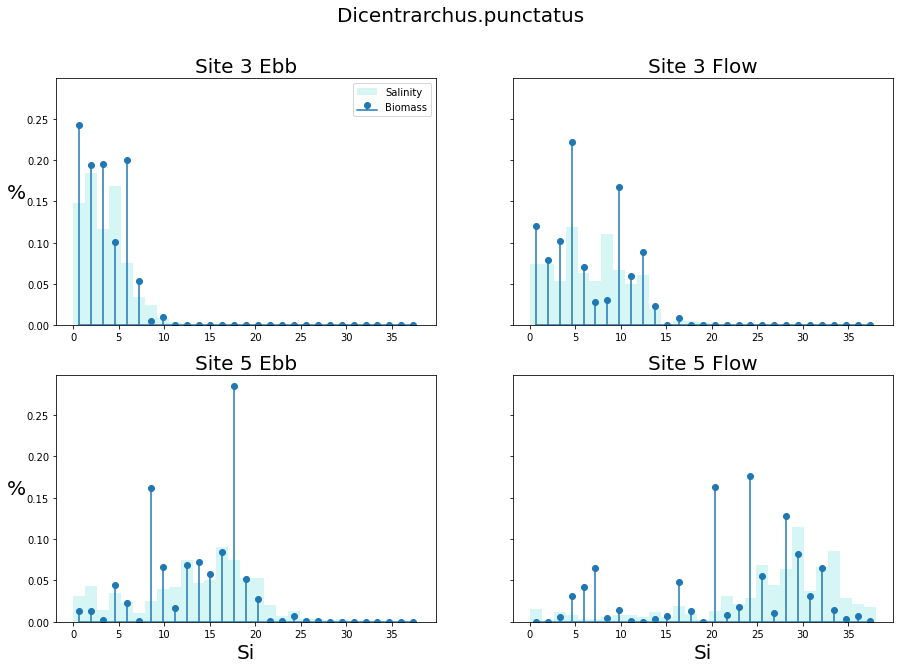

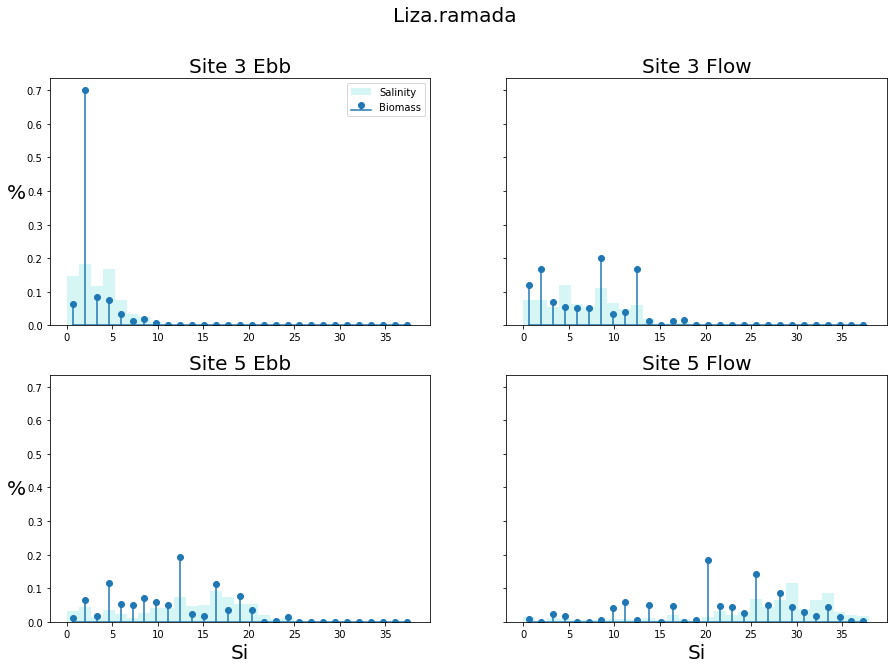

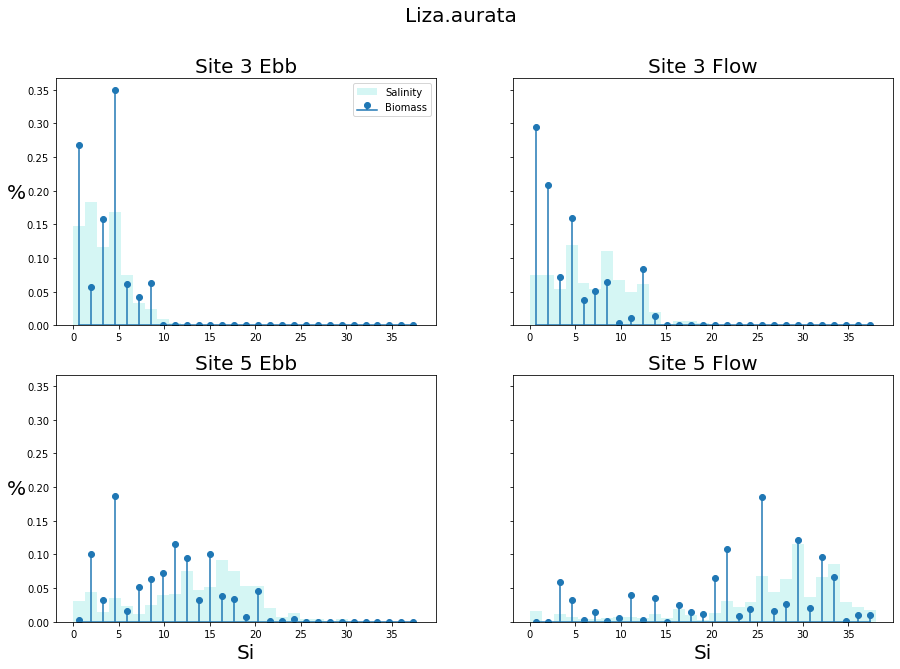

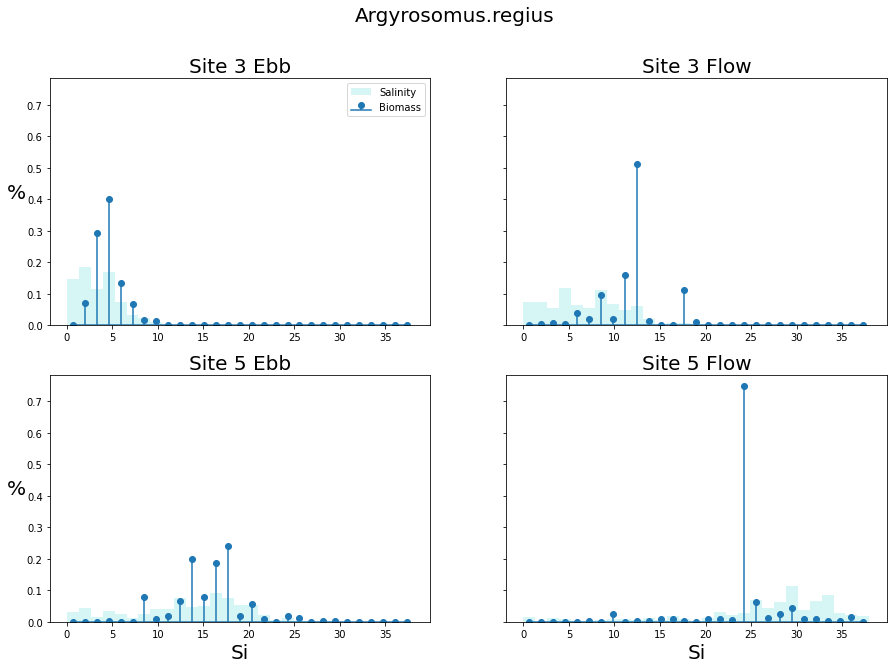

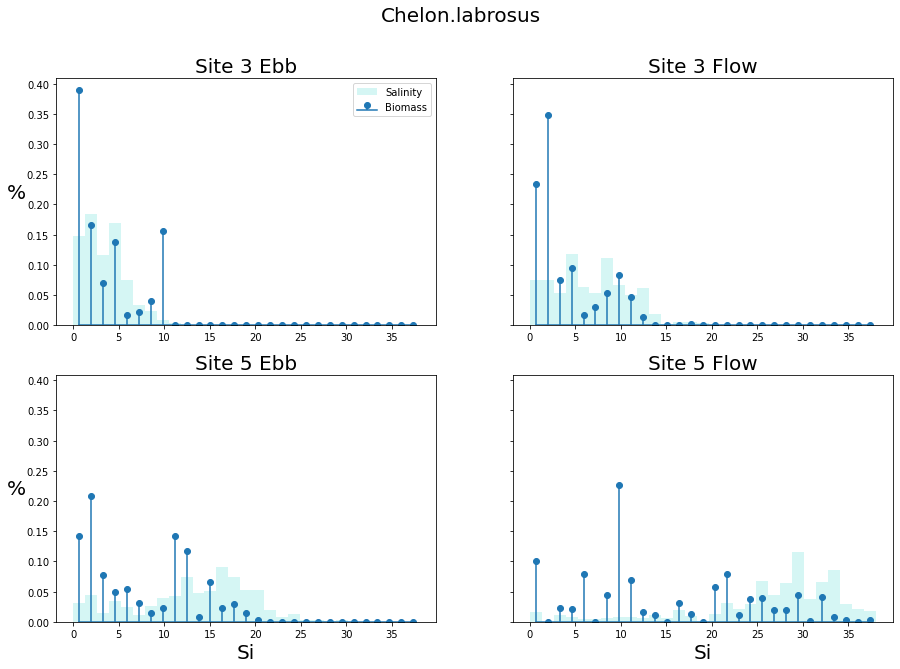

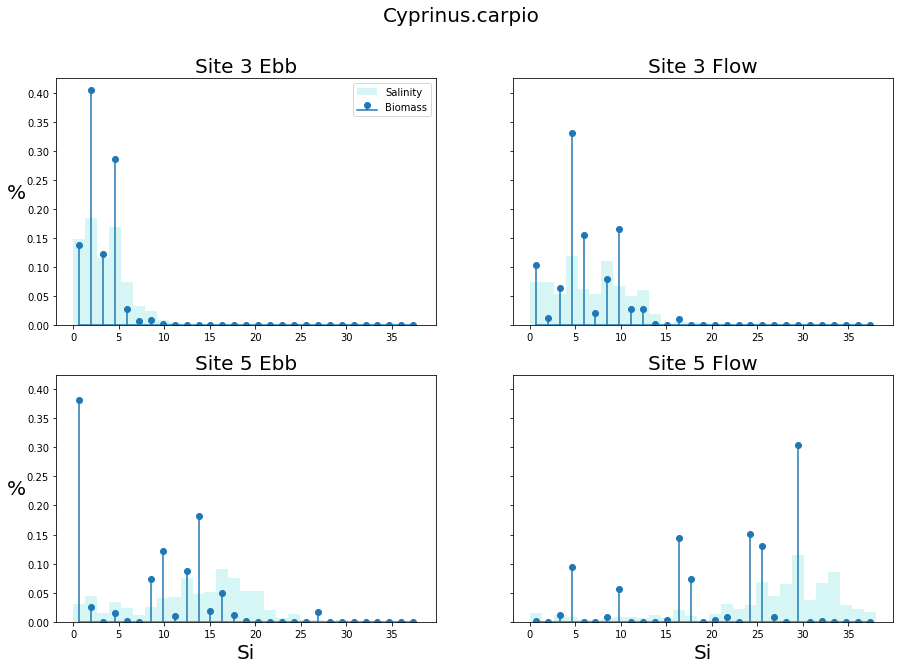

In [21]:
plot_salinity_biomass(compsig_df, 30, sig_species)